In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

In [2]:
url=('https://in.finance.yahoo.com/quote/%5EBSESN?p=^BSESN')
r = requests.get(url)
print(r.text)

<!DOCTYPE html><html id="atomic" class="NoJs desktop" lang="en-IN"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8"/><title>S&amp;P BSE SENSEX (^BSESN) charts, data &amp; news – Yahoo Finance</title><meta name="keywords" content="^BSESN, S&amp;P BSE SENSEX, ^BSESN stock chart, S&amp;P BSE SENSEX stock chart, stock chart, stocks, quotes, finance"/><meta http-equiv="x-dns-prefetch-control" content="on"/><meta property="twitter:dnt" content="on"/><meta property="fb:app_id" content="131747896861126"/><meta name="theme-color" content="#400090"/><meta name="viewport" content="width=device-width, initial-scale=1"/><meta name="description" lang="en-IN" content="Find the latest information on S&amp;P BSE SENSEX (^BSESN) including data, charts, related news and more from Yahoo Finance"/><meta name="oath:guce:consent-host" content="guce.yahoo.com"/><meta name="msvalidate.01" content="A

In [3]:
web_content = BeautifulSoup(r.text, 'lxml')
web_content = web_content.find('div', {"class":"My(6px) Pos(r) smartphone_Mt(6px)"})
print(web_content)

<div class="My(6px) Pos(r) smartphone_Mt(6px)" data-reactid="29"><div class="D(ib) Va(m) Maw(65%) Ov(h)" data-reactid="30"><div class="D(ib) Mend(20px)" data-reactid="31"><span class="Trsdu(0.3s) Fw(b) Fz(36px) Mb(-4px) D(ib)" data-reactid="32">36,955.31</span><span class="Trsdu(0.3s) Fw(500) Pstart(10px) Fz(24px) C($negativeColor)" data-reactid="33">-651.58 (-1.73%)</span><div class="C($tertiaryColor) D(b) Fz(12px) Fw(n) Mstart(0)--mobpsm Mt(6px)--mobpsm" data-reactid="34" id="quote-market-notice"><span data-reactid="35">As of  2:08PM IST. Market open.</span></div></div></div><div class="D(ib) Mstart(30px) Va(t)" data-reactid="36"><div class="darla-container D-n D(n)" data-reactid="37" id="defaultTRADENOW-sizer"><!-- react-text: 38 --><!-- /react-text --><div class="" data-reactid="39" id="defaultTRADENOW-wrapper"><div id="defaultdestTRADENOW" style=""></div></div></div></div></div>


In [4]:
web_content = web_content.find('span').text
print(web_content)

36,955.31


In [5]:
def real_time_price():
    #url=('https://in.finance.yahoo.com/quote/') + stock_code + ('?p=') + stock_code
    url = ('https://in.finance.yahoo.com/quote/%5EBSESN?p=^BSESN')
    r = requests.get(url)
    web_content = BeautifulSoup(r.text, 'lxml')
    web_content = web_content.find('div', {"class":"My(6px) Pos(r) smartphone_Mt(6px)"})
    
    web_content = web_content.find('span').text
    
    if web_content == []:
        web_content = '99999'
          
    return web_content

In [6]:
s= real_time_price()
print(s)

36,950.33


In [9]:
for step in range(1,30):
    price = []
    col = []
    time_stamp = datetime.datetime.now()
    time_stamp = time_stamp.strftime("%Y-%m-%d %H:%M:%S")
    price.append(real_time_price())
    col = [time_stamp]
    col.extend(price)
    df = pd.DataFrame(col)
    df = df.T
    df.to_csv('stock data.csv', mode='a', header=False)
    print(col)

['2020-08-03 14:13:37', '36,995.15']
['2020-08-03 14:13:38', '36,994.13']
['2020-08-03 14:13:39', '36,995.37']
['2020-08-03 14:13:40', '36,995.38']
['2020-08-03 14:13:40', '36,995.38']
['2020-08-03 14:13:41', '36,994.46']
['2020-08-03 14:13:42', '36,994.46']
['2020-08-03 14:13:43', '36,997.37']
['2020-08-03 14:13:44', '36,998.46']
['2020-08-03 14:13:44', '36,998.46']
['2020-08-03 14:13:45', '36,998.30']
['2020-08-03 14:13:46', '36,998.07']
['2020-08-03 14:13:47', '36,997.70']
['2020-08-03 14:13:47', '36,998.30']
['2020-08-03 14:13:48', '36,998.30']
['2020-08-03 14:13:49', '36,997.60']
['2020-08-03 14:13:50', '36,997.60']
['2020-08-03 14:13:51', '36,995.63']
['2020-08-03 14:13:51', '36,997.94']
['2020-08-03 14:13:52', '36,996.55']
['2020-08-03 14:13:53', '36,996.55']
['2020-08-03 14:13:53', '36,996.68']
['2020-08-03 14:13:54', '36,996.68']
['2020-08-03 14:13:55', '36,996.68']
['2020-08-03 14:13:56', '36,996.68']
['2020-08-03 14:13:57', '36,995.91']
['2020-08-03 14:13:57', '36,995.91']
[

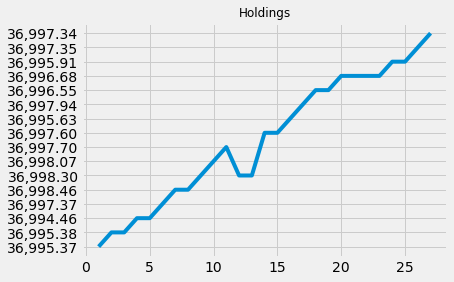

In [10]:
style.use('fivethirtyeight')
fig = plt.figure()
ax1 = fig.add_subplot(111)



def animate(i):
    df = pd.read_csv('stock data.csv')
    
    ys = df.iloc[1:, 2].values
    xs = list(range(1, len(ys)+1))
    ax1.clear()
    ax1.plot(xs, ys)
    ax1.set_title('Holdings', fontsize=12)
    
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.tight_layout()
plt.show()    
